# Data Preprocessing

In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import os

In [ ]:
# Load the data
Train_dataset = pd.read_csv('/content/train (1).csv')
Train_dataset.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
# Get the list of columns in dataset:
Train_dataset.columns

Index(['Class Index', 'Title', 'Description'], dtype='object')

In [ ]:
# Show information about the data
Train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
Train_dataset

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


In [ ]:
# Replace class index numbers with category names
class_mapping = {
    1: 'World',
    2: 'Sports',
    3: 'Business',
    4: 'Sci/Tech'
}
Train_dataset['Class Index'] = Train_dataset['Class Index'].map(class_mapping)  # <-- ADDED THIS

def trim(df):
    df.columns = df.columns.str.strip()
    df = df.drop_duplicates()
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')
    df_obj = df.select_dtypes(['object'])
    df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
    print("All column names have been striped, lowered case, replaced space with underscore if any")
    print("Dropped duplicated instances if any")
    print("Categorical instances have been striped")
    return df

pd.set_option('display.max_colwidth', 255)
Train_dataset = trim(Train_dataset)

def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    if r:
        return vc_df
    else:
        print(f'STATUS: Value counts of "{column}"...')
        display(vc_df)

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

Train_dataset.head(3)

All column names have been striped, lowered case, replaced space with underscore if any
Dropped duplicated instances if any
Categorical instances have been striped


,class_index,title,description
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.


In [ ]:
shape(Train_dataset,'Train_dataset')

STATUS: Dimension of "Train_dataset" = (120000, 3)


In [ ]:
news_list = [] ; word_count_list =[]
for class_index in Train_dataset['class_index'].unique():
    df_filter = Train_dataset.loc[(Train_dataset['class_index'] == class_index)]
    word_count_temp = df_filter['description'].str.split().str.len().sum()
    news_list.append(class_index)
    word_count_list.append(word_count_temp)
word_count_df = pd.DataFrame({'AG News':news_list, 'Word Count':word_count_list})
word_count_df['Word Count'] = word_count_df['Word Count'].astype('int')
word_count_df = word_count_df.sort_values('Word Count', ascending=False)
word_count_df.reset_index(drop=True)

,AG News,Word Count
0,World,948948
1,Sports,940183
2,Business,922199
3,Sci/Tech,915931


In [ ]:
vc(Train_dataset , 'class_index')

STATUS: Value counts of "class_index"...


,count,percentage (%)
class_index,,
Business,30000,25.0
Sci/Tech,30000,25.0
Sports,30000,25.0
World,30000,25.0


In [ ]:
# to print data shape
print(f'data shape is: {Train_dataset.shape}')

# to identify the null values by descending order
Train_dataset.isnull().sum().sort_values(ascending = False)

data shape is: (120000, 3)


,0
class_index,0
title,0
description,0


In [ ]:
Train_dataset = Train_dataset[:10000]

In [ ]:
vc(Train_dataset , 'class_index') # to show that class distribution is still approximately even

STATUS: Value counts of "class_index"...


,count,percentage (%)
class_index,,
Sci/Tech,2662,26.62
World,2523,25.23
Business,2477,24.77
Sports,2338,23.38


## Lower-case

In [ ]:
def lower(Train_dataset, attribute):
    Train_dataset.loc[:,attribute] = Train_dataset[attribute].apply(lambda x : str.lower(x))
    return Train_dataset
Train_dataset = lower(Train_dataset,'description')
Train_dataset.head(3)

,class_index,title,description
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"reuters - short-sellers, wall street's dwindling\band of ultra-cynics, are seeing green again."
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),"reuters - private investment firm carlyle group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters - soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.


## Remove punctuation

In [ ]:
warnings.filterwarnings('ignore')
def remove_punc_num(Train_dataset, attribute):
    Train_dataset.loc[:,attribute] = Train_dataset[attribute].apply(lambda x : " ".join(re.findall('[\w]+',x)))
    Train_dataset[attribute] = Train_dataset[attribute].str.replace('\d+', '')
    return Train_dataset
Train_dataset =remove_punc_num(Train_dataset, 'description')
df_no_punc =Train_dataset.copy()
Train_dataset.head(3)

,class_index,title,description
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street s dwindling band of ultra cynics are seeing green again
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums


## Tokenization

In [ ]:
tk =WhitespaceTokenizer()
def tokenise(Train_dataset, attribute):
    Train_dataset['tokenised'] = Train_dataset.apply(lambda row: tk.tokenize(str(row[attribute])), axis=1)
    return Train_dataset
Train_dataset =tokenise(Train_dataset, 'description')
df_experiment =Train_dataset.copy()
Train_dataset.head(3)

,class_index,title,description,tokenised
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street s dwindling band of ultra cynics are seeing green again,"[reuters, short, sellers, wall, street, s, dwindling, band, of, ultra, cynics, are, seeing, green, again]"
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,"[reuters, private, investment, firm, carlyle, group, which, has, a, reputation, for, making, well, timed, and, occasionally, controversial, plays, in, the, defense, industry, has, quietly, placed, its, bets, on, another, part, of, the, market]"
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums,"[reuters, soaring, crude, prices, plus, worries, about, the, economy, and, the, outlook, for, earnings, are, expected, to, hang, over, the, stock, market, next, week, during, the, depth, of, the, summer, doldrums]"


## Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
def stemming(df, attribute):
    # Use English stemmer.
    stemmer = SnowballStemmer("english")
    df['stemmed'] = df[attribute].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
    return df
Train_dataset =stemming(df_experiment, 'tokenised')
Train_dataset.head(2)

,class_index,title,description,tokenised,stemmed
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street s dwindling band of ultra cynics are seeing green again,"[reuters, short, sellers, wall, street, s, dwindling, band, of, ultra, cynics, are, seeing, green, again]","[reuter, short, seller, wall, street, s, dwindl, band, of, ultra, cynic, are, see, green, again]"
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,"[reuters, private, investment, firm, carlyle, group, which, has, a, reputation, for, making, well, timed, and, occasionally, controversial, plays, in, the, defense, industry, has, quietly, placed, its, bets, on, another, part, of, the, market]","[reuter, privat, invest, firm, carlyl, group, which, has, a, reput, for, make, well, time, and, occasion, controversi, play, in, the, defens, industri, has, quiet, place, it, bet, on, anoth, part, of, the, market]"


## Remove stop words

In [ ]:
# Removing stop words
import nltk
nltk.download('stopwords')
def remove_stop_words(df, attribute):
    stop = stopwords.words('english')
    df['stemmed_without_stop'] = df[attribute].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
    return df
Train_dataset = remove_stop_words(Train_dataset, 'stemmed')
Train_dataset.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,class_index,title,description,tokenised,stemmed,stemmed_without_stop
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street s dwindling band of ultra cynics are seeing green again,"[reuters, short, sellers, wall, street, s, dwindling, band, of, ultra, cynics, are, seeing, green, again]","[reuter, short, seller, wall, street, s, dwindl, band, of, ultra, cynic, are, see, green, again]",reuter short seller wall street dwindl band ultra cynic see green
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,"[reuters, private, investment, firm, carlyle, group, which, has, a, reputation, for, making, well, timed, and, occasionally, controversial, plays, in, the, defense, industry, has, quietly, placed, its, bets, on, another, part, of, the, market]","[reuter, privat, invest, firm, carlyl, group, which, has, a, reput, for, make, well, time, and, occasion, controversi, play, in, the, defens, industri, has, quiet, place, it, bet, on, anoth, part, of, the, market]",reuter privat invest firm carlyl group reput make well time occasion controversi play defens industri quiet place bet anoth part market


In [ ]:
total_word_count = Train_dataset['description'].str.split().str.len().sum()
print(f'The word count of all description is: {int(total_word_count)}')

total_word_count_normalised = Train_dataset['stemmed_without_stop'].str.split().str.len().sum()
print(f'The word count of description after normalised is: {int(total_word_count_normalised)}')
print(f'{round((total_word_count - total_word_count_normalised)/total_word_count*100, 2)}% less word')

The word count of all description is: 334255
The word count of description after normalised is: 220170
34.13% less word


## Encode class label

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(Train_dataset['class_index'])
Train_dataset['encoded_target'] = le.transform(Train_dataset['class_index'])
Train_dataset.head(3)

,class_index,title,description,tokenised,stemmed,stemmed_without_stop,encoded_target
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),reuters short sellers wall street s dwindling band of ultra cynics are seeing green again,"[reuters, short, sellers, wall, street, s, dwindling, band, of, ultra, cynics, are, seeing, green, again]","[reuter, short, seller, wall, street, s, dwindl, band, of, ultra, cynic, are, see, green, again]",reuter short seller wall street dwindl band ultra cynic see green,0
1,Business,Carlyle Looks Toward Commercial Aerospace (Reuters),reuters private investment firm carlyle group which has a reputation for making well timed and occasionally controversial plays in the defense industry has quietly placed its bets on another part of the market,"[reuters, private, investment, firm, carlyle, group, which, has, a, reputation, for, making, well, timed, and, occasionally, controversial, plays, in, the, defense, industry, has, quietly, placed, its, bets, on, another, part, of, the, market]","[reuter, privat, invest, firm, carlyl, group, which, has, a, reput, for, make, well, time, and, occasion, controversi, play, in, the, defens, industri, has, quiet, place, it, bet, on, anoth, part, of, the, market]",reuter privat invest firm carlyl group reput make well time occasion controversi play defens industri quiet place bet anoth part market,0
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),reuters soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums,"[reuters, soaring, crude, prices, plus, worries, about, the, economy, and, the, outlook, for, earnings, are, expected, to, hang, over, the, stock, market, next, week, during, the, depth, of, the, summer, doldrums]","[reuter, soar, crude, price, plus, worri, about, the, economi, and, the, outlook, for, earn, are, expect, to, hang, over, the, stock, market, next, week, dure, the, depth, of, the, summer, doldrum]",reuter soar crude price plus worri economi outlook earn expect hang stock market next week dure depth summer doldrum,0


In [ ]:
Train_dataset.tail(3)

,class_index,title,description,tokenised,stemmed,stemmed_without_stop,encoded_target
9997,Business,CAO chief faces Singapore probe,the chief of beijing backed china aviation oil 39 s cao singapore unit has agreed to return to singapore this week to face investigators in the city state 39 s biggest financial scandal since the 1995 fall of barings bank company,"[the, chief, of, beijing, backed, china, aviation, oil, 39, s, cao, singapore, unit, has, agreed, to, return, to, singapore, this, week, to, face, investigators, in, the, city, state, 39, s, biggest, financial, scandal, since, the, 1995, fall, of, bar...","[the, chief, of, beij, back, china, aviat, oil, 39, s, cao, singapor, unit, has, agre, to, return, to, singapor, this, week, to, face, investig, in, the, citi, state, 39, s, biggest, financi, scandal, sinc, the, 1995, fall, of, bare, bank, compani]",chief beij back china aviat oil 39 cao singapor unit agre return singapor week face investig citi state 39 biggest financi scandal sinc 1995 fall bare bank compani,0
9998,Business,A Microsoft deal gets full EU inquiry,brussels the european commission has opened an in depth investigation into microsoft 39 s and time warner 39 s plans to jointly acquire contentguard holdings a specialist in software that protects digital material from counterfeiting a commission spok...,"[brussels, the, european, commission, has, opened, an, in, depth, investigation, into, microsoft, 39, s, and, time, warner, 39, s, plans, to, jointly, acquire, contentguard, holdings, a, specialist, in, software, that, protects, digital, material, fro...","[brussel, the, european, commiss, has, open, an, in, depth, investig, into, microsoft, 39, s, and, time, warner, 39, s, plan, to, joint, acquir, contentguard, hold, a, specialist, in, softwar, that, protect, digit, materi, from, counterfeit, a, commis...",brussel european commiss open depth investig microsoft 39 time warner 39 plan joint acquir contentguard hold specialist softwar protect digit materi counterfeit commiss spokeswoman,0
9999,Sci/Tech,Feds Bust File-Sharing Sites,operation digital gridlock targets peer to peer sites isps in piracy investigation,"[operation, digital, gridlock, targets, peer, to, peer, sites, isps, in, piracy, investigation]","[oper, digit, gridlock, target, peer, to, peer, site, isp, in, piraci, investig]",oper digit gridlock target peer peer site isp piraci investig,1


## Extract N-grams

In [ ]:
# function to flatten one list
def flat_list(unflat_list):
    flatted = [item for sublist in unflat_list for item in sublist]
    return flatted

def to_list(df, attribute):
    # Select the normalised description column
    df_description = df[[attribute]]
    # To convert the attribute into list format, but it has inner list. So it cannot put into the CountVectoriser
    unflat_list_description = df_description.values.tolist()
    # Let's use back the function defined above, "flat_list", to flatten the list
    flat_list_description = flat_list(unflat_list_description)
    return flat_list_description
flat_list_description = to_list(Train_dataset, 'stemmed_without_stop')

In [ ]:
# Extract 3 Types of N-Gram

n_gram_features ={'unigram':(1,1),'bigram':(2,2), \
       'trigram':(3,3)}
feature_name=[]
temp=[]
for key, values in n_gram_features.items():
    temp.append(key)
    feature_name.append(key)
temp

['unigram', 'bigram', 'trigram']

In [ ]:
def generate_n_gram_features(flat_list_description):
    temp=[]
    for key, values in n_gram_features.items():
        vectorizer = CountVectorizer(ngram_range=values)
        vectorizer.fit(flat_list_description)
        temp.append(vectorizer.transform(flat_list_description))
    return temp
temp = generate_n_gram_features(flat_list_description)

In [ ]:
# Dimension of Each Feature Vector
dataframes = {'unigram':temp[0],
              'bigram':temp[1],
              'trigram':temp[2]}
feature_vector = [] ; feature_vector_shape = []
for key in dataframes:
    feature_vector.append(key)
    feature_vector_shape.append(dataframes[key].shape)

n_gram_df = pd.DataFrame({'N-Gram Feature Vector':feature_vector, 'Data Dimension':feature_vector_shape})
n_gram_df

,N-Gram Feature Vector,Data Dimension
0,unigram,"(10000, 14156)"
1,bigram,"(10000, 122065)"
2,trigram,"(10000, 151842)"


In [ ]:
# to retrieve a unigram feature vector
dataframes['unigram']

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 204631 stored elements and shape (10000, 14156)>

# Classification Models

In [ ]:
# Import necessary packages
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')
random_state_number =8888
df_target =Train_dataset[['encoded_target']].values.ravel()

In [ ]:
metrics = {
    'f1':[f1_score, 'f1_macro'],
    'precision': [precision_score, 'precision_macro'],
    'recall': [recall_score, 'recall_macro']
}

# get evaluation result

def get_performance(param_grid, base_estimator, dataframes):
    df_name_list =[]; best_estimator_list=[]; best_score_list=[]; test_predict_result_list=[];
    metric_list = [];

    for df_name, df in dataframes.items():
        print(df_name)
        X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.2, random_state=random_state_number)
        for _, metric_dict in metrics.items():
            print(metric_dict)
            sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5, scoring=metric_dict[1],random_state=random_state_number, factor=2).fit(X_train, y_train)
            best_estimator = sh.best_estimator_
            clf = best_estimator.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            test_predict_result = metric_dict[0](y_test, prediction, average='macro')

            df_name_list.append(df_name) ; best_estimator_list.append(best_estimator) ;
            best_score_list.append(sh.best_score_) ;
            test_predict_result_list.append(test_predict_result) ;metric_list.append(metric_dict[1])
    model_result = pd.DataFrame({'Vector':df_name_list,'Metric':metric_list,
                               'Calibrated Estimator':best_estimator_list,
                               'Best CV Metric Score':best_score_list, 'Test Predict Metric Score': test_predict_result_list})
    return model_result



In [ ]:
# Visualising Classification Prediction
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

def vis_classification(vector_type = 'unigram', estimator = KNeighborsClassifier(n_neighbors=9)):
    pca = PCA(n_components=2)
    df1 = pca.fit_transform(np.array(dataframes[vector_type].todense()))
    X_train, X_test, y_train, y_test = train_test_split(df1, df_target, test_size=0.2, random_state=random_state_number)

    # get training set
    df2 = pd.DataFrame({'pca1':X_train[:,1], 'pca2': X_train[:,0], 'y':le.inverse_transform(y_train)})
    min_1, max_1 = df2['pca1'].min(), df2['pca1'].max()
    min_2, max_2 = df2['pca2'].min(), df2['pca2'].max()

    # generate dimension reduced, but extended data
    pca1_range = np.linspace(min_1,max_1,30)
    pca2_range = np.linspace(min_2,max_2,30)

    # shuffle
    np.random.shuffle(pca1_range) ; np.random.shuffle(pca2_range)

    # to dataframe
    prediction_test = pd.DataFrame({'pca1':pca1_range, 'pca2':pca2_range})

    best_estimator = estimator

    # fit training set and predict extended data
    clf = best_estimator.fit(X_train, y_train)

    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,6))
    cmap = plt.cm.get_cmap('tab10', 4)
    fig.suptitle(f"Visualising {type(estimator).__name__} on {vector_type.capitalize()} Vector", fontsize=14,fontweight='bold')

    def plot_scatter(ax, predictor_set, target, title):

        # plot area classifier
        clf = best_estimator.fit(X_train, y_train)
        axs[0].tricontourf(X_train[:,0], X_train[:,1], clf.predict(X_train), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")

        axs[1].tricontourf(X_test[:,0], X_test[:,1], clf.predict(X_test), levels=np.arange(-0.5, 4), zorder=10, alpha=0.3, cmap=cmap, edgecolors="k")
        # plot scatter
        df3 = pd.DataFrame({'pca1':predictor_set[:,1], 'pca2': predictor_set[:,0], 'y':le.inverse_transform(target)})
        for y_label in df3['y'].unique():
            df_filter = df3[df3['y']==y_label]
            ax.scatter(df_filter['pca1'], df_filter['pca2'], alpha=1,label=f"{y_label}")
        ax.legend()
        ax.set_title(f'{title} ({predictor_set.shape[0]} Samples)',fontweight='bold')
    plot_scatter(axs[0], X_train, y_train, 'Training Set')
    plot_scatter(axs[1], X_test, y_test, 'Testing Set')
    axs[0].sharey(axs[1])
    return plt.show()

In [ ]:
def get_best_vector_clf(knn_result):

    temp = knn_result[knn_result['Metric'] =='f1_macro']
    temp2 = temp.iloc[temp['Best CV Metric Score'].idxmax()].to_frame().T
    best_vector = temp2['Vector'].values[0]
    best_clf = temp2['Calibrated Estimator'].values[0]\

    return best_vector, best_clf

## Random forest Classifier

In [ ]:
# Try performance on different parameters
param_grid = {'max_depth': [30,32,35],'min_samples_split': [2,150,170]}
base_estimator = RandomForestClassifier(random_state=random_state_number)
rfc_result = get_performance(param_grid, base_estimator, dataframes)
rfc_result

unigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']
bigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']
trigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']


,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1459224502), DecisionTreeClassifier(max_depth=3...",0.820005,0.827384
1,unigram,precision_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1459224502), DecisionTreeClassifier(max_depth=3...",0.827548,0.831083
2,unigram,recall_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt',\n random_state=1459224502), DecisionTreeClassifier(max_depth=3...",0.818247,0.827313
3,bigram,f1_macro,"(DecisionTreeClassifier(max_depth=32, max_features='sqrt',\n random_state=1985925507), DecisionTreeClassifier(max_depth=32, max_features='sqrt',\n random_state=1459224502), DecisionTreeClassifier(max_depth=3...",0.645898,0.657978
4,bigram,precision_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=150,\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=150,\n random_state=1...",0.775948,0.779986
5,bigram,recall_macro,"(DecisionTreeClassifier(max_depth=32, max_features='sqrt',\n random_state=1985925507), DecisionTreeClassifier(max_depth=32, max_features='sqrt',\n random_state=1459224502), DecisionTreeClassifier(max_depth=3...",0.629357,0.642410
6,trigram,f1_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1...",0.405758,0.416580
7,trigram,precision_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1...",0.755772,0.757024
8,trigram,recall_macro,"(DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1985925507), DecisionTreeClassifier(max_depth=35, max_features='sqrt', min_samples_split=170,\n random_state=1...",0.426791,0.434868


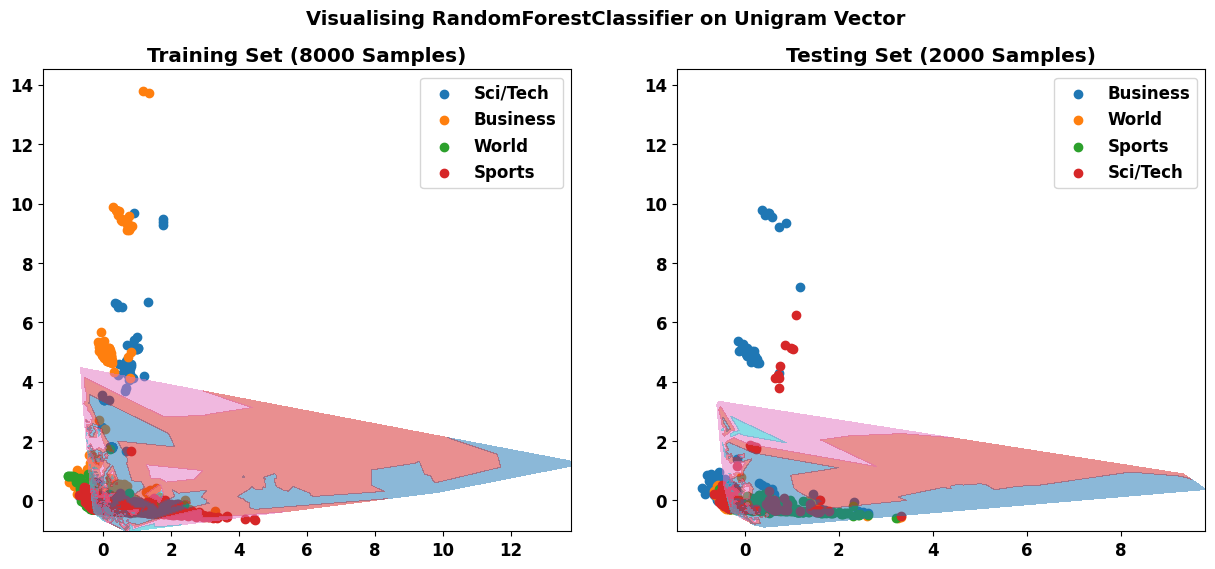

In [ ]:
# Get best N-gram and corresponding classifier parameters
best_vector, best_clf =  get_best_vector_clf(rfc_result)
vis_classification(vector_type = best_vector, estimator = best_clf)

## KNN Classifier

In [ ]:
# Try performance on different parameters
param_grid = {'n_neighbors': [5,7,9]}
base_estimator = KNeighborsClassifier()
knn_result = get_performance(param_grid, base_estimator, dataframes)
knn_result

unigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']
bigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']
trigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']


,Vector,Metric,Calibrated Estimator,Best CV Metric Score,Test Predict Metric Score
0,unigram,f1_macro,KNeighborsClassifier(),0.623094,0.666116
1,unigram,precision_macro,KNeighborsClassifier(n_neighbors=9),0.743353,0.768665
2,unigram,recall_macro,KNeighborsClassifier(),0.614384,0.656921
3,bigram,f1_macro,KNeighborsClassifier(),0.269213,0.286752
4,bigram,precision_macro,KNeighborsClassifier(n_neighbors=7),0.709811,0.718117
5,bigram,recall_macro,KNeighborsClassifier(),0.340121,0.355473
6,trigram,f1_macro,KNeighborsClassifier(),0.208188,0.251230
7,trigram,precision_macro,KNeighborsClassifier(n_neighbors=7),0.682039,0.645334
8,trigram,recall_macro,KNeighborsClassifier(),0.298237,0.338901


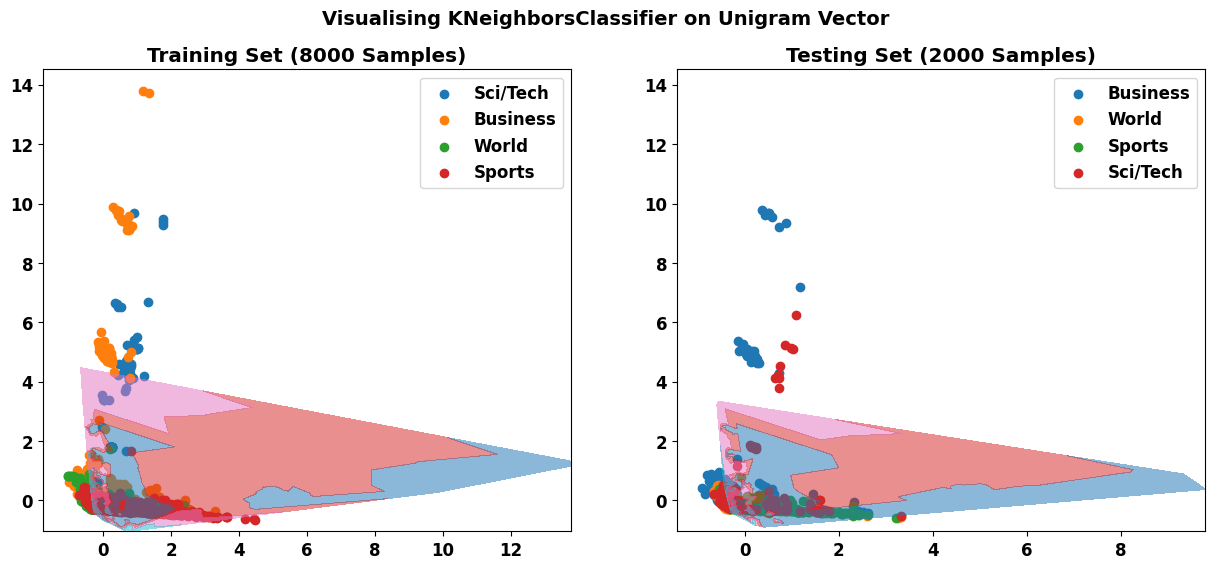

In [ ]:
# Get best N-gram and corresponding classifier parameters
best_vector, best_clf =  get_best_vector_clf(knn_result)
vis_classification(vector_type = best_vector, estimator = best_clf)

## Decision Tree Classifier

In [ ]:
# Try performance on different parameters

param_grid = {'max_depth': [4,6,7],'min_samples_split': [2,3,4]}
base_estimator = DecisionTreeClassifier(random_state=random_state_number)
dtc_result = get_performance(param_grid, base_estimator, dataframes)
dtc_result

unigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']
[<function recall_score at 0x7d373540afc0>, 'recall_macro']
bigram
[<function f1_score at 0x7d373540a660>, 'f1_macro']
[<function precision_score at 0x7d373540ae80>, 'precision_macro']


In [ ]:
# Get best N-gram and corresponding classifier parameters
best_vector, best_clf =  get_best_vector_clf(dtc_result)
vis_classification(vector_type = best_vector, estimator = best_clf)

# Evaluation

In [ ]:
# Get the best results form each classifier
df_result = pd.concat([knn_result,
                      dtc_result,
                      rfc_result
                      ]
                     ).reset_index(drop=True)

df_result.groupby(['Metric']).max(numeric_only=True)

In [ ]:
def get_best_result(df_result, metric_score):
    df_result_t = df_result[df_result.Metric== 'precision_macro']
    precision_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'recall_macro']
    recall_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    df_result_t = df_result[df_result.Metric== 'f1_macro']
    f1_macro_df = df_result_t.loc[df_result_t[metric_score].idxmax()].to_frame().T

    return pd.concat([precision_macro_df,recall_macro_df,f1_macro_df])

In [ ]:
best_cv_result = get_best_result(df_result, 'Best CV Metric Score')
display(best_cv_result)
temp = best_cv_result[best_cv_result['Metric'] == 'f1_macro']
best_clf = temp['Calibrated Estimator'].values[0]
best_vector = temp['Vector'].values[0]

In [ ]:
get_best_result(df_result, 'Test Predict Metric Score')

## Evaluation on test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataframes[best_vector], df_target, test_size=0.2, \
                                                    random_state=random_state_number)
clf = best_clf.fit(X_train, y_train)
y_test_pred= clf.predict(X_test)
target_names = ['Worlds', 'Sports', 'Business', "Sci/Tech"]
print(classification_report(y_test,y_test_pred,target_names=target_names))

In [ ]:
sample_predict = pd.DataFrame({'Actual Y Test': le.inverse_transform(y_test),'Best Prediction':le.inverse_transform(y_test_pred)})
sample_predict.head(20)

In [ ]:
!pip install -q gradio torch torchvision requests

In [ ]:
import os
!wget -q https://github.com/gradio-app/gradio/raw/main/demo/image_classification/cheetah.jpg

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Save the LabelEncoder
joblib.dump(le, "label_encoder.pkl")

# Create and fit the final vectorizer using best_vector
final_vectorizer = CountVectorizer(ngram_range=n_gram_features[best_vector])
final_vectorizer.fit(flat_list_description)
joblib.dump(final_vectorizer, "vectorizer.pkl")

# Save the best classifier
joblib.dump(best_clf, "random_forest_model.pkl")


In [ ]:
import gradio as gr
import joblib
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re

# Load saved model, vectorizer, and label encoder
model = joblib.load("random_forest_model.pkl")
vectorizer = joblib.load("vectorizer.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# Preprocessing function
def preprocess_description(description):
    tk = WhitespaceTokenizer()
    stemmer = SnowballStemmer("english")
    stop = stopwords.words('english')

    # Lowercase and clean
    description = description.lower()
    description = " ".join(re.findall(r"[\w]+", description))
    description = re.sub(r"\d+", "", description)

    # Tokenize, stem, remove stopwords
    tokens = tk.tokenize(description)
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    filtered_tokens = [word for word in stemmed_tokens if word not in stop]

    return " ".join(filtered_tokens)

# Prediction function
def predict(description):
    processed = preprocess_description(description)
    vectorized = vectorizer.transform([processed])
    prediction_probs = model.predict_proba(vectorized)[0]

    class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
    confidences = {class_names[i]: float(prediction_probs[i]) for i in range(len(prediction_probs))}
    return confidences

# Gradio UI
demo = gr.Interface(
    fn=predict,
    inputs=gr.Textbox(lines=5, placeholder="Enter news description..."),
    outputs=gr.Label(num_top_classes=3),
    examples=[
        ["the chief of beijing backed china aviation oil 39 s cao singapore unit has agreed to return to singapore this week to face investigators in the city state 39 s biggest financial scandal since the 1995 fall of barings bank company"],
        ["reuters some people are born to be the life and soul of the party and so it seems are some dolphins"]
    ],
    title="News Category Classifier",
    description="Enter a news description to classify it into Business, Sci/Tech, Sports, or World."
)

# Launch the app
demo.launch()
